In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [44]:
df = pd.read_csv('./inv3_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [45]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df1=df1[df1['Ambient temperature(℃)']>6]
df1=df1[df1['Irradiance(W/㎡)']>300]
df1=df1[df1['Total input power(kW)']>76]
df=df[df['Hieu suat']<100]
df=df[df['Hieu suat']>50]
df=df[(df['Inverter status']=='Grid connected')|(df['Inverter status']=='Grid connected : power limited')]
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-03 14:15:00,1,1,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,25.0,31.1,1.8,NaN,0.124,...,3,14,3,Thursday,86,62,26.693750,41127.249323,79.499603,2022-03-03
2022-03-03 14:20:00,2,2,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.7,31.0,3.1,NaN,0.208,...,3,14,3,Thursday,86,62,26.433125,42034.361515,79.261344,2022-03-03
2022-03-03 14:25:00,3,3,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.6,29.6,1.0,NaN,0.275,...,3,14,3,Thursday,86,62,25.823750,29599.363502,80.839576,2022-03-03
2022-03-03 14:35:00,5,5,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.7,29.5,2.5,NaN,0.390,...,3,14,3,Thursday,86,62,25.948750,30220.976202,81.377252,2022-03-03
2022-03-03 14:40:00,6,6,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.4,29.1,2.7,NaN,0.451,...,3,14,3,Thursday,86,62,25.707500,31608.577733,82.360555,2022-03-03
2022-03-03 14:45:00,7,7,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.5,29.3,2.8,NaN,0.516,...,3,14,3,Thursday,86,62,25.793750,31288.274492,80.739512,2022-03-03
2022-03-03 14:50:00,8,8,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.4,28.4,1.4,NaN,0.569,...,3,14,3,Thursday,86,62,25.329375,22429.365269,79.516294,2022-03-03
2022-03-03 14:55:00,9,9,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.2,27.4,2.2,NaN,0.608,...,3,14,3,Thursday,86,62,24.945000,17948.639716,79.565918,2022-03-03
2022-03-03 15:00:00,10,10,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,24.2,27.1,2.1,NaN,0.643,...,3,15,3,Thursday,87,63,24.903125,16936.588731,79.319397,2022-03-03


In [46]:
df1=df[df.groupby(['month','date'])['Hieu suat'].transform(max)==df['Hieu suat']]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [47]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

               datetime  Hieu suat  month  stt
0   2022-03-03 16:55:00  97.327272      3    0
1   2022-03-04 15:55:00  93.116419      3    1
2   2022-03-05 10:25:00  95.048243      3    2
3   2022-03-07 11:15:00  94.016794      3    3
4   2022-03-08 16:30:00  91.016100      3    4
..                  ...        ...    ...  ...
170 2022-08-21 14:30:00  93.523394      8  170
171 2022-08-22 16:55:00  85.697269      8  171
172 2022-08-23 15:30:00  90.915118      8  172
173 2022-08-24 16:00:00  78.650753      8  173
174 2022-08-25 07:35:00  77.314516      8  174

[175 rows x 4 columns]
Estimated coefficients:
b_0 = 91.38606369598418
b_1 = -0.03429405119372165


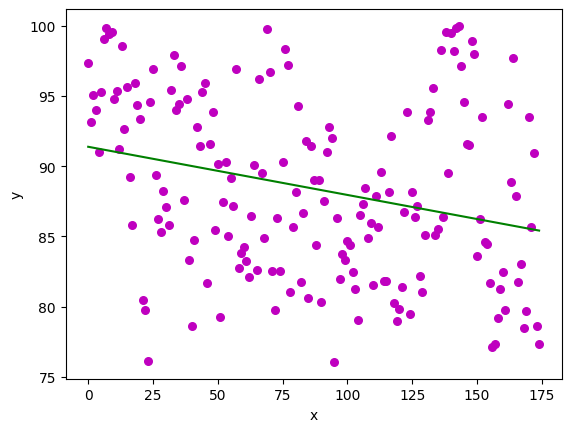

In [48]:
df_bin = df1[['Hieu suat','month']] 
x = len(df_bin)
num_index = range(0,x,1)
df_bin =  df_bin.reset_index()
df_bin.loc[:,'stt'] = pd.Series(num_index, df_bin.index)
print(df_bin)  
# Renaming the columns for easier writing of the code 
df_bin.head() 
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred= b[0] + b[1]*x
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=y_pred,
    name="Hiệu suất tuyến tính inverter 3 "))
fig.show()

Estimated coefficients:
b_0 = 93.6647178125729
b_1 = -0.08669476414520662


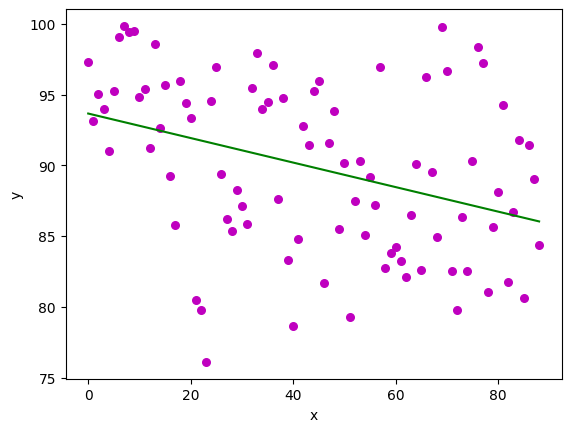

Estimated coefficients:
b_0 = 84.29792699038424
b_1 = 0.019820435694881237


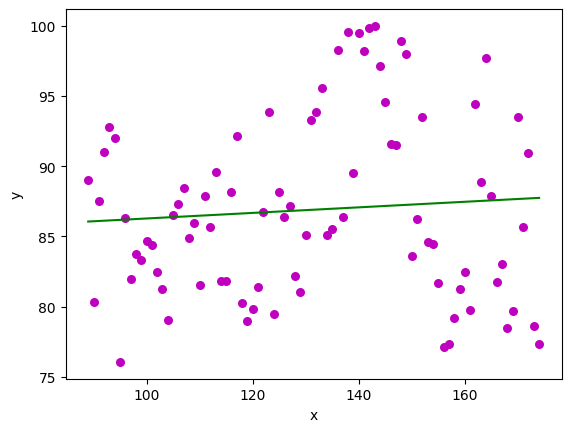

In [49]:
df2=df1[df1['month']<7]
df3=df1[df1['month']>=6]
df_bin2=df_bin[df_bin['month']<6]
df_bin3=df_bin[df_bin['month']>=6]
x=df_bin2['stt'].tolist()
y=df_bin2['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred2= b[0] + b[1]*x
x=df_bin3['stt'].tolist()
y=df_bin3['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred3= b[0] + b[1]*x
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=y_pred2,
    name="Hiệu suất tuyến tính inverter 3 thang3,4,5"))
fig2 . update_traces (
    showlegend = True 
    )
fig2.update_xaxes(
    rangeslider_visible=True,
    )   
fig2.show()
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=y_pred3,
    name="Hiệu suất tuyến tính inverter 3 thang6,7,8"))
fig3 . update_traces (
    showlegend = True 
    )
fig3.update_xaxes(
    rangeslider_visible=True,
    )   
fig3.show()